# 2. 서울시 범죄 현황 분석
## 2-1. 데이터 정리하기

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

# 한글설정
mpl.rcParams['axes.unicode_minus'] = False # minus 표시
# mpl.rc('axes', unicode_minus=False)
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Malgun' in f.name]
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
# mpl.rc('font', family='Malgun Gothic')
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
crime_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv', thousands=',', 
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [5]:
station_name = []

for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [6]:
station_address = ['대한민국 서울특별시 중구 을지로동 수표로 27',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46',
 '대한민국 서울특별시 중구 남대문로5가 한강대로 410',
 '대한민국 서울특별시 서대문구 미근동 통일로 113',
 '대한민국 서울특별시 종로구 종로1.2.3.4가동 창경궁로 112-16',
 '대한민국 서울특별시 용산구 원효로1가 25',
 '대한민국 서울특별시 성북구 삼선동5가 301',
 '대한민국 서울특별시 동대문구 청량리동 약령시로21길 29',
 '대한민국 서울특별시 마포구 아현동 618-1',
 '대한민국 서울특별시 영등포구 당산동3가 2-11',
 '대한민국 서울특별시 성동구 행당1동 왕십리광장로 9',
 '대한민국 서울특별시 동작구 노량진동 72',
 '대한민국 서울특별시 광진구 구의1동 자양로 167',
 '대한민국 서울특별시 은평구 대조동 통일로 757',
 '대한민국 서울특별시 강북구 번1동 415-15',
 '대한민국 서울특별시 관악구 신림동 544',
 '대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10',
 '대한민국 서울특별시 강남구 대치동 998',
 '대한민국 서울특별시 관악구 봉천동',
 '대한민국 서울특별시 양천구 신월동 화곡로 73',
 '대한민국 서울특별시 강동구 성내1동 성내로 57',
 '대한민국 서울특별시 성북구 종암동 종암로 135',
 '대한민국 서울특별시 구로구 가마산로 235',
 '대한민국 서울특별시 서초구 서초3동 반포대로 179',
 '대한민국 서울특별시 양천구 신정6동 목동동로 99',
 '대한민국 서울특별시 송파구 가락본동 9',
 '대한민국 서울특별시 노원구 하계동 노원로 283',
 '대한민국 서울특별시 서초구 방배2동 방배천로 54',
 '대한민국 서울특별시 은평구 불광2동 연서로 365',
 '대한민국 서울특별시 도봉구 창4동 노해로 403',
 '대한민국 서울특별시 강남구 개포동 개포로 617']

In [7]:
station_lat = [37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718401,
 37.538649,
 37.5897271,
 37.58506149999999,
 37.550814,
 37.5257884,
 37.5617309,
 37.5130685,
 37.542873,
 37.6128611,
 37.6373881,
 37.4814051,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4815453,
 37.6283597,
 37.6533589,
 37.49349]

In [8]:
station_lng = [126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9988562,
 126.966055,
 127.0161318,
 127.0457679,
 126.954028,
 126.901006,
 127.0363806,
 126.9428078,
 127.083821,
 126.9274951,
 127.0273238,
 126.9099508,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9829992,
 126.9287226,
 127.052682,
 127.0772119]

In [9]:
station_address[0]

'대한민국 서울특별시 중구 을지로동 수표로 27'

In [13]:
gu_name = []

for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [14]:
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,관악구


In [15]:
crime_anal_police.loc[crime_anal_police['관서명']=='금천서', ['구별']] = '금천구'
crime_anal_police[crime_anal_police['관서명']=='금천서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
15,금천서,3,4,6,6,151,122,1567,888,2054,1776,금천구


In [16]:
crime_anal_police.to_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                         sep=',', encoding='utf-8')

In [17]:
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


## 2-2. pandas의 pivot_table 익히기

In [18]:
df = pd.read_excel("data/02. sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [19]:
pd.pivot_table(df,index=["Name"]) # default : mean

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [20]:
pd.pivot_table(df,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [21]:
pd.pivot_table(df,index=["Manager","Rep"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

In [22]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [23]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [24]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],aggfunc=[np.mean,len])

mean   len
                                    Price Price
Manager       Rep                              
Debra Henley  Craig Booker   20000.000000     4
              Daniel Hilton  38333.333333     3
              John Smith     20000.000000     2
Fred Anderson Cedric Moss    27500.000000     4
              Wendy Yule     44250.000000     4

In [25]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum])

sum                             
                                Price                             
Product                           CPU Maintenance Monitor Software
Manager       Rep                                                 
Debra Henley  Craig Booker    65000.0      5000.0     NaN  10000.0
              Daniel Hilton  105000.0         NaN     NaN  10000.0
              John Smith      35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss     95000.0      5000.0     NaN  10000.0
              Wendy Yule     165000.0      7000.0  5000.0      NaN

In [26]:
pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],
               columns=["Product"],aggfunc=[np.sum],fill_value=0)

sum                             
                              Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

In [27]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],aggfunc=[np.sum],fill_value=0)

sum         
                                          Price Quantity
Manager       Rep           Product                     
Debra Henley  Craig Booker  CPU           65000        2
                            Maintenance    5000        2
                            Software      10000        1
              Daniel Hilton CPU          105000        4
                            Software      10000        1
              John Smith    CPU           35000        1
                            Maintenance    5000        2
Fred Anderson Cedric Moss   CPU           95000        3
                            Maintenance    5000        1
                            Software      10000        1
              Wendy Yule    CPU          165000        7
                            Maintenance    7000        3
                            Monitor        5000        2

In [28]:
pd.pivot_table(df,index=["Manager","Rep","Product"],
               values=["Price","Quantity"],
               aggfunc=[np.sum,np.mean],fill_value=0,margins=True)

sum            mean          
                                          Price Quantity  Price  Quantity
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500  1.000000
                            Maintenance    5000        2   5000  2.000000
                            Software      10000        1  10000  1.000000
              Daniel Hilton CPU          105000        4  52500  2.000000
                            Software      10000        1  10000  1.000000
              John Smith    CPU           35000        1  35000  1.000000
                            Maintenance    5000        2   5000  2.000000
Fred Anderson Cedric Moss   CPU           95000        3  47500  1.500000
                            Maintenance    5000        1   5000  1.000000
                            Software      10000        1  10000  1.000000
              Wendy Yule    CPU          165000        7  82500  3.500000
                            Maintenance    7000        3   7000  3.000000
                            Monitor        5000        2   5000  2.000000
All                                      522000       30  30705  1.764706

## 2-3. 범죄 데이터 구별로 정리하기

In [29]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [31]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [32]:
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [33]:
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [34]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [35]:
from sklearn import preprocessing # scaling

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [37]:
result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding='UTF-8', 
                          index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [38]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [39]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


In [40]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


## 2-4. seaborn

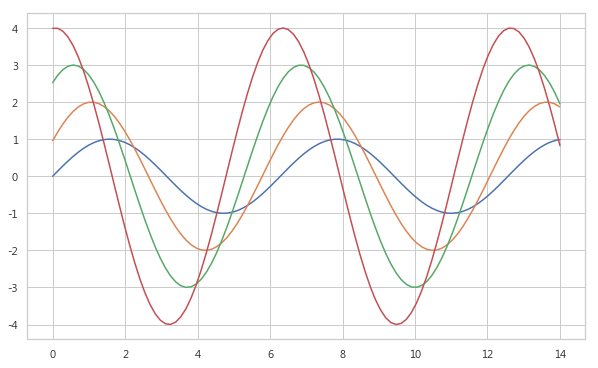

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

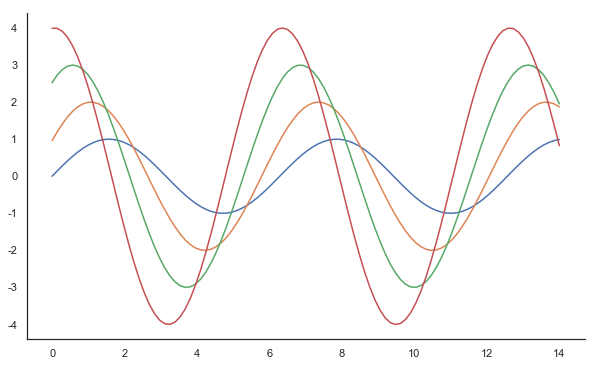

In [42]:
sns.set_style("white")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine()

plt.show()

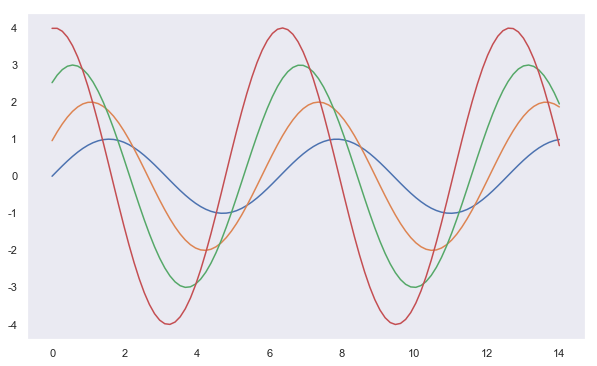

In [43]:
sns.set_style("dark")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

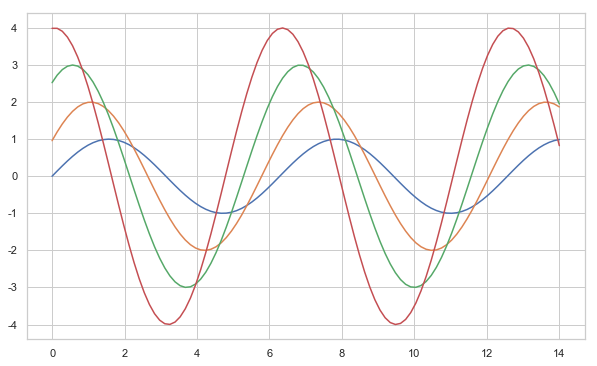

In [44]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)
plt.show()

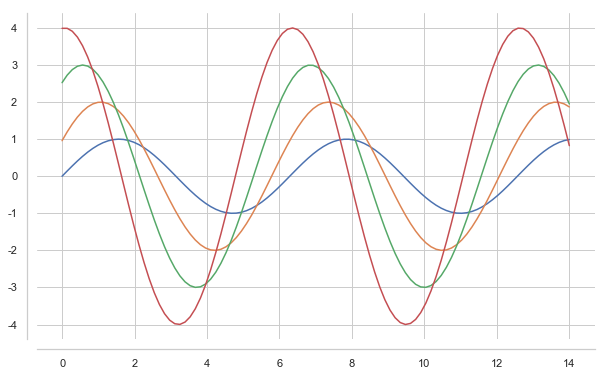

In [45]:
plt.figure(figsize=(10,6))
plt.plot(x,y1, x,y2, x,y3, x,y4)

sns.despine(offset=10)

plt.show()

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [47]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


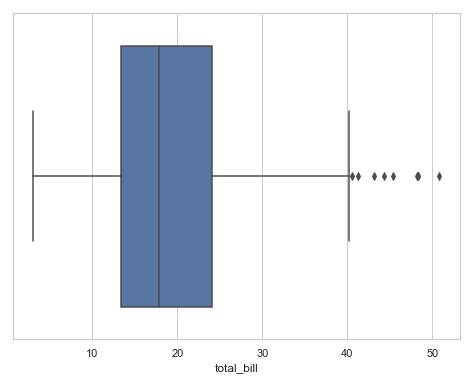

In [48]:
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))
sns.boxplot(x=tips["total_bill"])
plt.show()

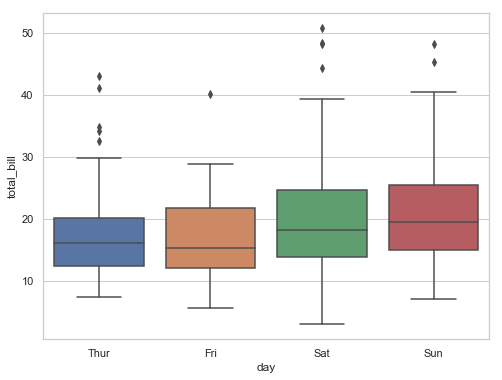

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

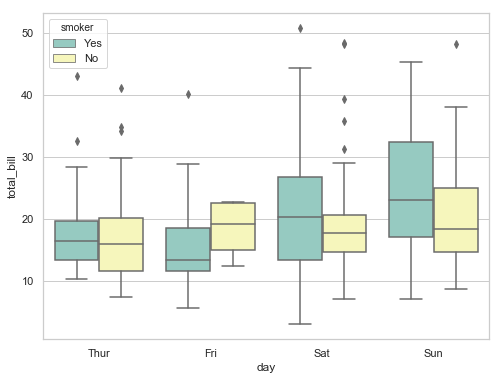

In [50]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")
plt.show()

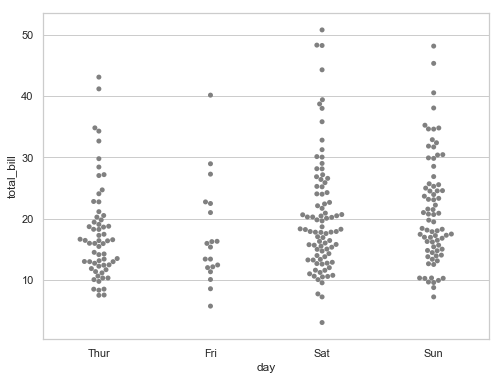

In [51]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="day", y="total_bill", data=tips, color=".5")
plt.show()

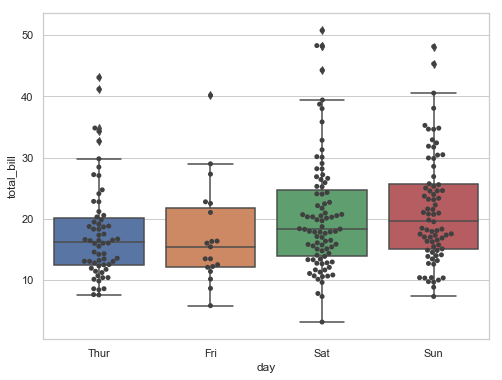

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.show()

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


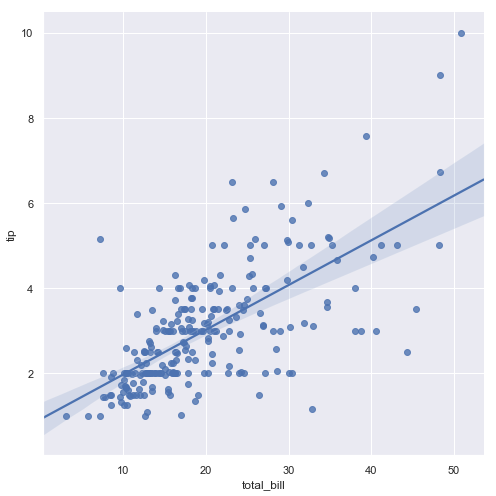

In [55]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7)
plt.show()

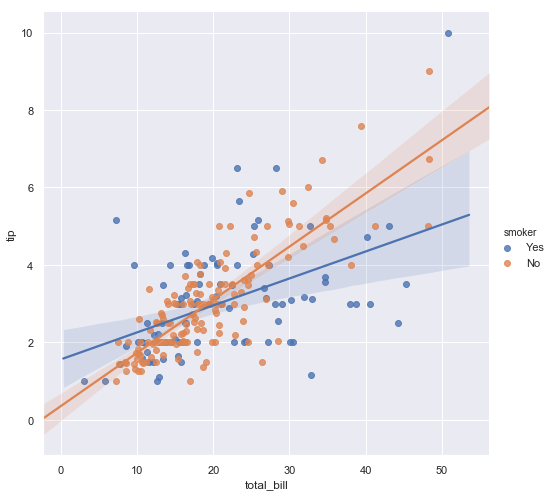

In [56]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, height=7)
plt.show()

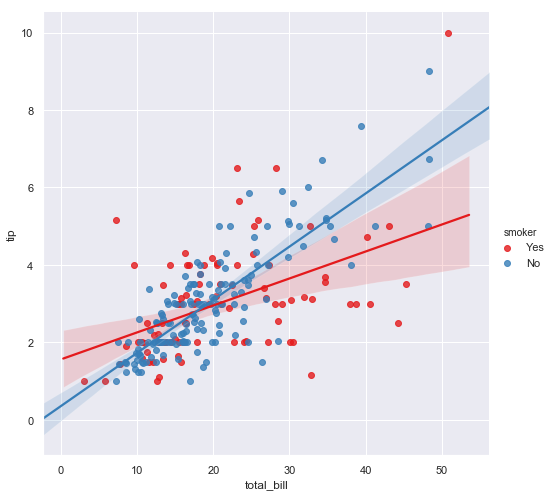

In [57]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", height=7)
plt.show()

In [58]:
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.96549707, 0.03836124, 0.58962477, 0.83054406, 0.23681641,
        0.86151521, 0.5842302 , 0.70420958, 0.16107059, 0.45586407,
        0.08908216, 0.75337636],
       [0.5646857 , 0.93070984, 0.55312621, 0.54210803, 0.07885836,
        0.10659164, 0.15691363, 0.31560429, 0.64333866, 0.86065703,
        0.69242153, 0.92793218],
       [0.65663279, 0.46560775, 0.74473004, 0.21276098, 0.05677091,
        0.90811382, 0.62152548, 0.13078002, 0.36486746, 0.46362579,
        0.54986098, 0.96851717],
       [0.01314102, 0.00386287, 0.83623905, 0.47749457, 0.47810728,
        0.97079192, 0.2522473 , 0.16474982, 0.29337633, 0.56010468,
        0.44636408, 0.35736975],
       [0.34260269, 0.00184761, 0.56525507, 0.80309003, 0.79653791,
        0.74475412, 0.57181229, 0.12588397, 0.69345675, 0.0234196 ,
        0.35910646, 0.81507495],
       [0.61958968, 0.66494501, 0.32441027, 0.72316325, 0.9614701 ,
        0.30596781, 0.68230458, 0.54570481, 0.60447059, 0.97996072,
        0.3955327 ,

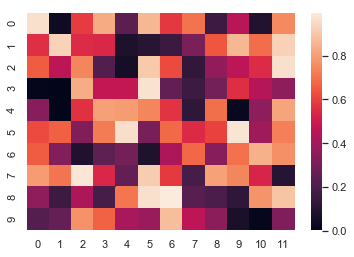

In [59]:
sns.heatmap(uniform_data)
plt.show()

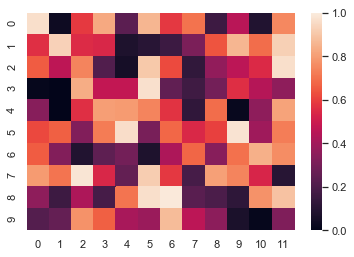

In [60]:
sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

In [61]:
flights = sns.load_dataset("flights")
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [62]:
flights = flights.pivot("month", "year", "passengers")
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


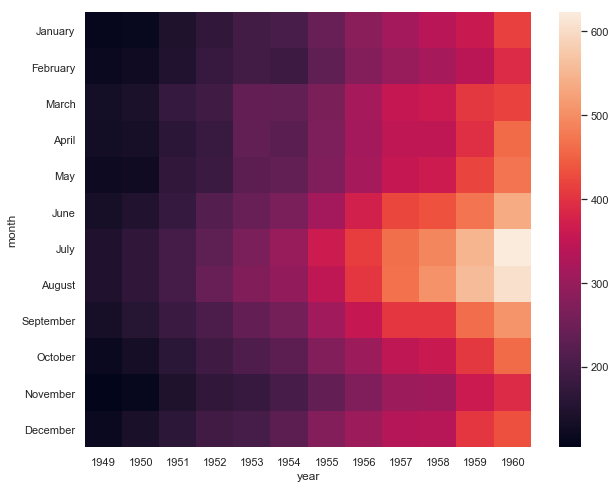

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(flights)
plt.show()

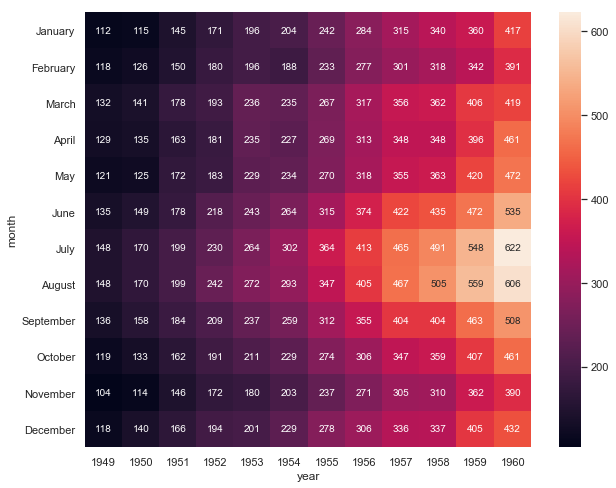

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

In [65]:
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


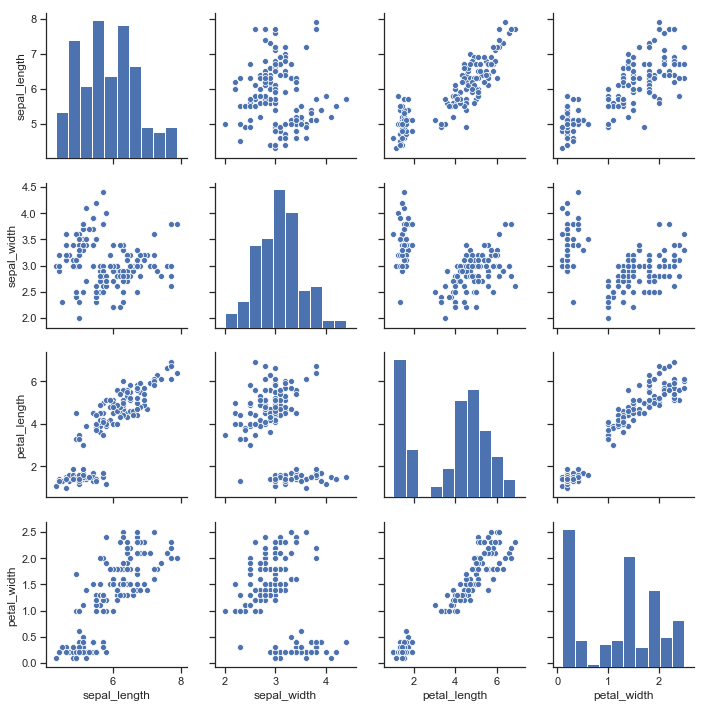

In [66]:
sns.pairplot(iris)
plt.show()

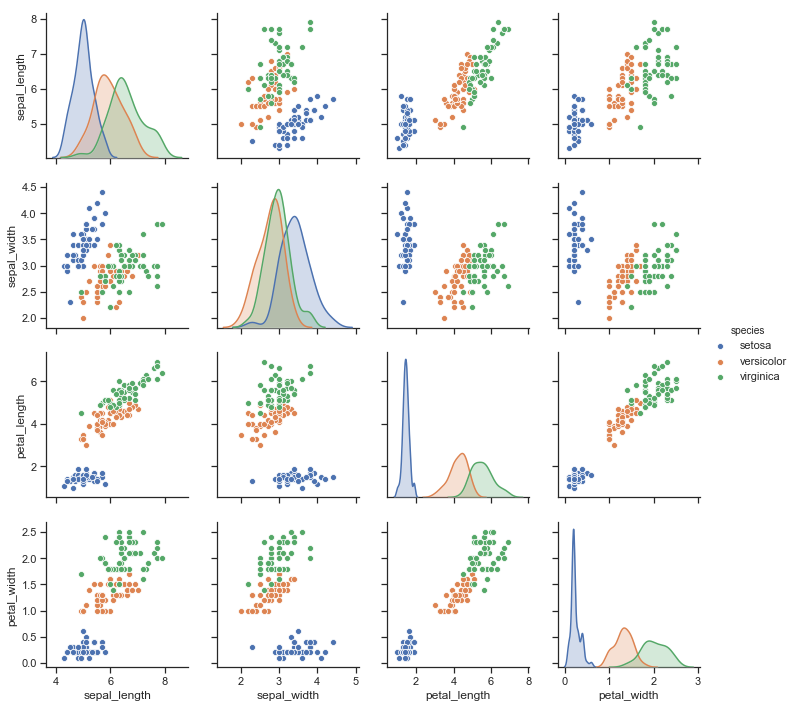

In [67]:
sns.pairplot(iris, hue="species")
plt.show()

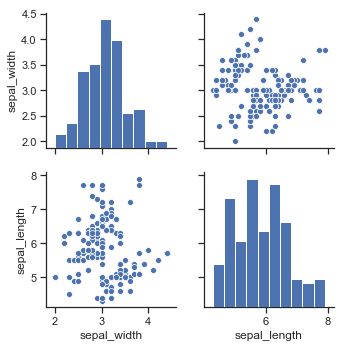

In [68]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])
plt.show()

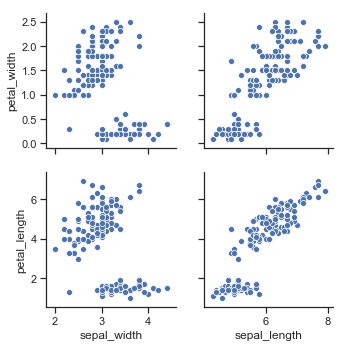

In [69]:
sns.pairplot(iris, x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])
plt.show()

In [70]:
anscombe = sns.load_dataset("anscombe")
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


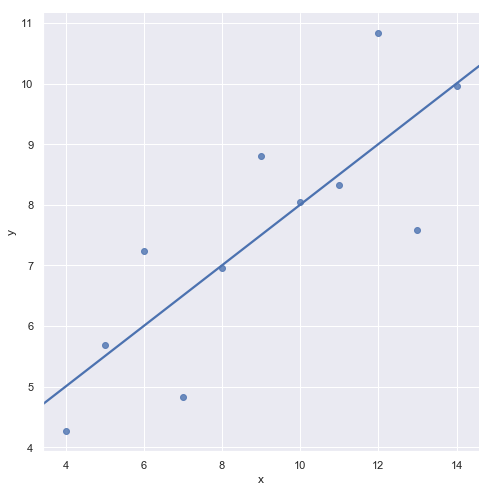

In [72]:
sns.set_style("darkgrid")

sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),  ci=None, height=7)
plt.show()

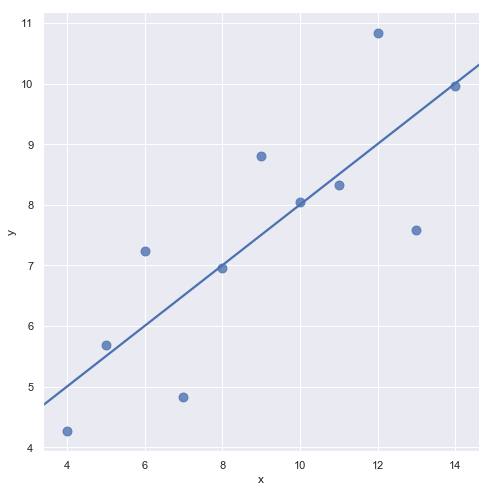

In [74]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

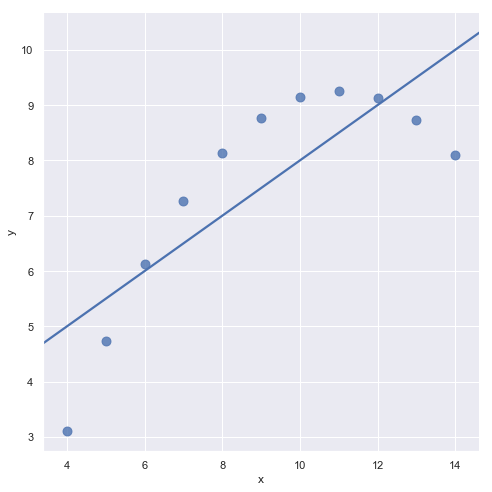

In [75]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=1, ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

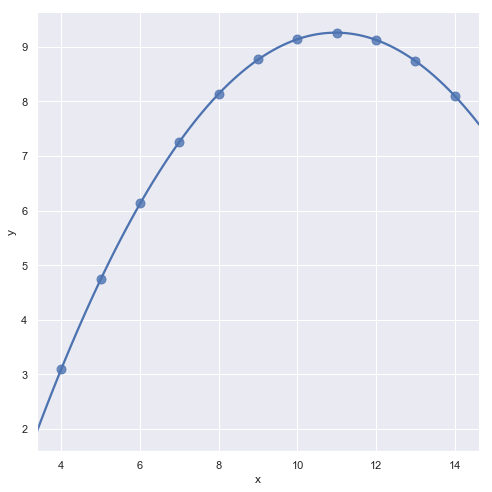

In [77]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

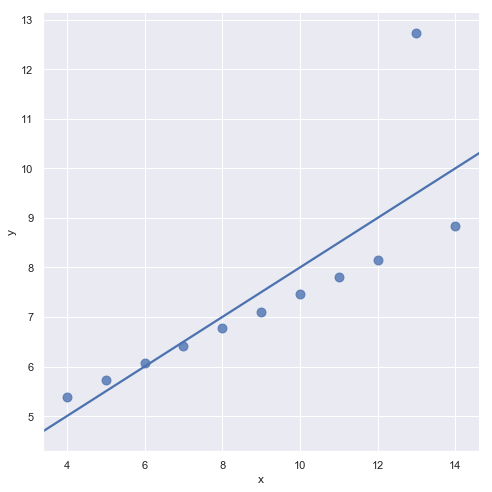

In [78]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

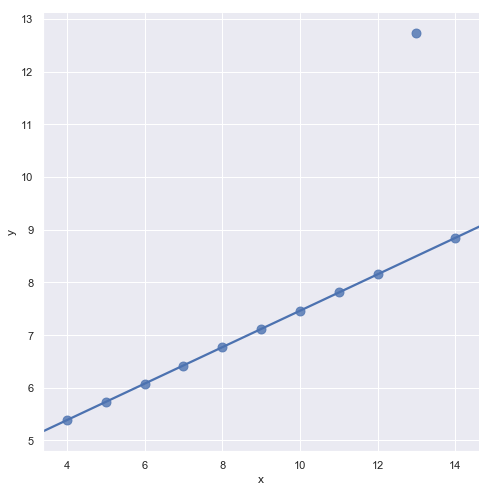

In [80]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80}, height=7)
plt.show()

## 2-5. Visualization using seaborn

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [82]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


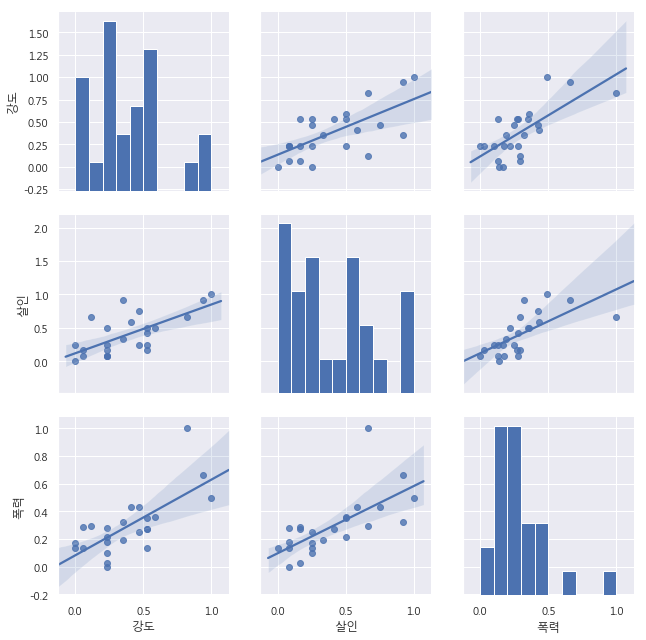

In [84]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', height=3)
plt.show()

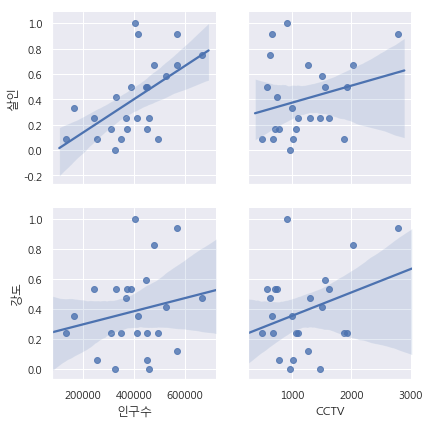

In [85]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인", "강도"], kind='reg', height=3)
plt.show()

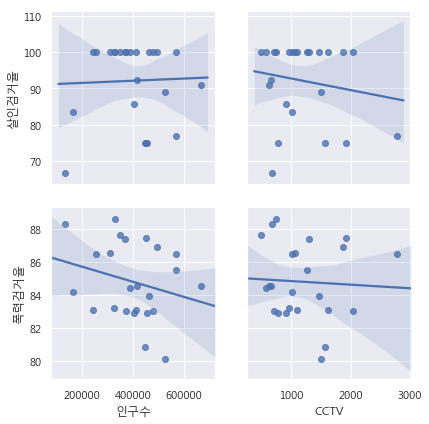

In [86]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인검거율", "폭력검거율"], kind='reg', height=3)
plt.show()

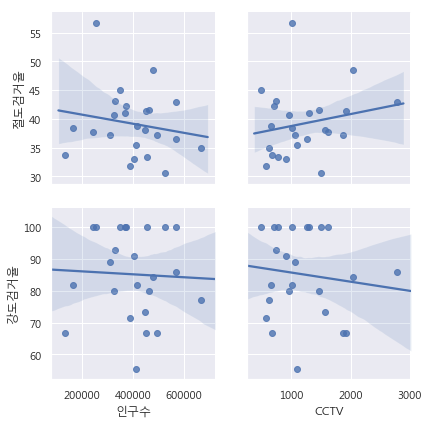

In [87]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["절도검거율", "강도검거율"], kind='reg', height=3)
plt.show()

In [88]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.589867,97.997139
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.034438,96.375820
동대문구,0.204611,0.470588,0.250000,0.314061,0.250887,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.490147,95.444250
용산구,0.265130,0.529412,0.250000,0.169004,0.133128,89.175258,100.0,100.0,37.700706,83.121951,244203.0,1624,1.346674,94.776790


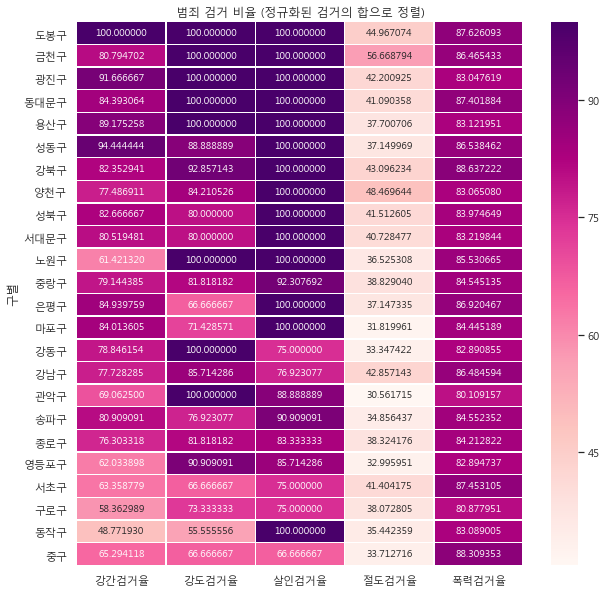

In [89]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

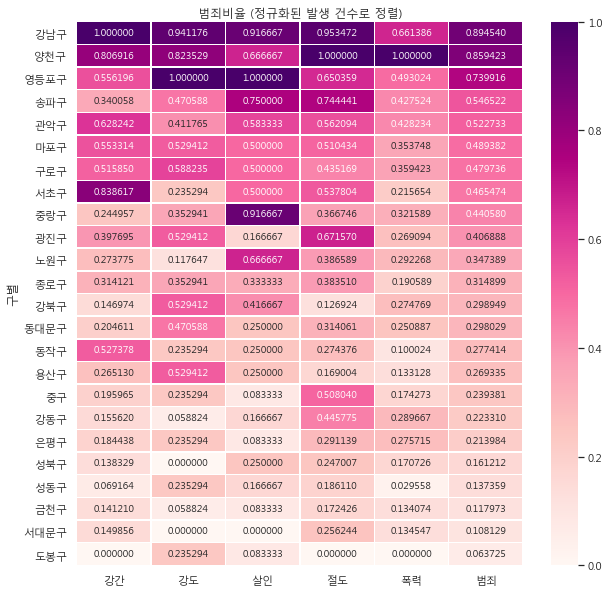

In [90]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

## 2-6. Folium

In [92]:
import folium

In [93]:
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm

In [94]:
stamen = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
stamen

In [95]:
stamen = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                    zoom_start=13)
stamen

In [96]:
stamen = folium.Map(location=[45.5236, -122.6750], 
                    tiles='Stamen Terrain', zoom_start=13)
stamen

In [97]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
map_1

In [98]:
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12, 
                   tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', 
              icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', 
              icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location', 
              icon=folium.Icon(color='red',icon='info-sign')).add_to(map_1)
map_1

In [99]:
map_2 = folium.Map(location=[45.5236, -122.6750], tiles='Stamen Toner', 
                   zoom_start=13)
folium.Marker([45.5244, -122.6699], popup='The Waterfront' ).add_to(map_2)
folium.CircleMarker([45.5215, -122.6261], radius=50, 
                    popup='Laurelhurst Park', color='#3186cc', 
                    fill_color='#3186cc', ).add_to(map_2)
map_2

In [100]:
map_5 = folium.Map(location=[45.5236, -122.6750], zoom_start=13)
folium.RegularPolygonMarker([45.5012, -122.6655], 
                            popup='Ross Island Bridge', fill_color='#132b5e', 
                            number_of_sides=3, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5132, -122.6708], 
                            popup='Hawthorne Bridge', fill_color='#45647d', 
                            number_of_sides=4, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5275, -122.6692], 
                            popup='Steel Bridge', fill_color='#769d96', 
                            number_of_sides=6, radius=10).add_to(map_5)
folium.RegularPolygonMarker([45.5318, -122.6745], 
                            popup='Broadway Bridge', fill_color='#769d96', 
                            number_of_sides=8, radius=10).add_to(map_5)
map_5

In [101]:
import folium
import pandas as pd

In [102]:
state_unemployment = 'data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [103]:
state_geo = 'data/02. folium_us-states.json'

map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
             columns=['State', 'Unemployment'],
             key_on='feature.id',
             fill_color='YlGn',
             legend_name='Unemployment Rate (%)')
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 2-7. 범죄율에 대한 지도 시각화

In [104]:
import json
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [105]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [106]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [107]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [109]:
tmp_criminal = crime_anal_norm['살인'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map

In [110]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map

In [111]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['검거'],
               columns = [crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id')
map

## 2-7. 경찰서별 검거현황과 구별 범죄발생 현황을 표현하기

In [112]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571840,126.998856,1.198382


In [113]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], 
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

In [114]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [115]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map